In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Load data

In [91]:
df_New=pd.read_csv('Humandataset.csv')

In [92]:
df_New.isnull().sum().all()

False

In [93]:
df_New.duplicated().sum().all()

False

In [94]:
df_New.describe()

,Unnamed: 0,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
count,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,...,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000
mean,5149.000000,0.274347,-0.017743,-0.108925,-0.607784,-0.510191,-0.613064,-0.633593,-0.525697,-0.614989,...,-0.298592,-0.617700,0.007705,0.002648,0.017683,-0.009219,-0.496522,0.063255,-0.054284,16.146422
std,2973.209545,0.067628,0.037128,0.053033,0.438694,0.500240,0.403657,0.413333,0.484201,0.399034,...,0.320199,0.308796,0.336591,0.447364,0.616188,0.484770,0.511158,0.305468,0.268898,8.679067
min,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
25%,2574.500000,0.262625,-0.024902,-0.121019,-0.992360,-0.976990,-0.979137,-0.993293,-0.977017,-0.979064,...,-0.536174,-0.841847,-0.124694,-0.287031,-0.493108,-0.389041,-0.817288,0.002151,-0.131880,9.000000
50%,5149.000000,0.277174,-0.017162,-0.108596,-0.943030,-0.835032,-0.850773,-0.948244,-0.843670,-0.845068,...,-0.335160,-0.703402,0.008146,0.007668,0.017192,-0.007186,-0.715631,0.182028,-0.003882,17.000000
75%,7723.500000,0.288354,-0.010625,-0.097589,-0.250293,-0.057336,-0.278737,-0.302033,-0.087405,-0.288149,...,-0.113167,-0.487981,0.149005,0.291490,0.536137,0.365996,-0.521503,0.250790,0.102970,24.000000
max,10298.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,30.000000


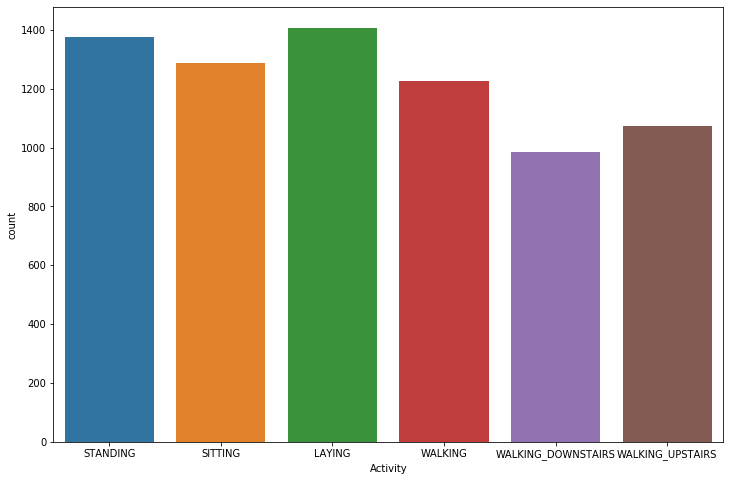

In [95]:
plt.figure(figsize = (12,8))
sns.countplot(x = 'Activity', data = df_train);

# Classification Phase


### Splitting data to train and test

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

During train uncomment this cell

In [79]:
print('X_train_shape ---->',X_train.shape)
print('X_test_shape ---->',X_test.shape)
print('Y_train_shape ---->',y_train.shape)
print('Y_test_shape ---->',y_test.shape)

X_train_shape ----> (8239, 561)
X_test_shape ----> (2060, 561)
Y_train_shape ----> (8239, 1)
Y_test_shape ----> (2060, 1)


During train uncomment this cell

### Preprocessimg label data and feature

In [80]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y_labeled=le.fit_transform(y_train)
y_labeled_test=le.transform(y_test)
Y_all=le.transform(y)


In [81]:
z=le.inverse_transform(np.unique(y_labeled))


In [82]:
z

array(['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

In [83]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_Scaler_train=sc.fit_transform(X_train)
x_Scaler_test=sc.transform(X_test)
X_all=sc.transform(X)


### Using Support vector machine Classification

In [100]:
from sklearn.svm import SVC
classifier_SVC=SVC(kernel = 'linear')
classifier_SVC.fit(x_Scaler_train,y_labeled)
cv_svm_train = cross_val_score(classifier_SVC , X_all , Y_all, cv = 3)
print("Cross validation for train data SVC is : ",round(cv_svm_train.mean(),3))




Cross validation for train data SVC is :  0.954


During train uncomment this cell

Confusion matrix is :
  [[396   0   0   0   0   0]
 [  0 343  21   0   0   0]
 [  0   9 373   0   0   0]
 [  0   0   0 358   0   0]
 [  0   0   0   0 271   0]
 [  0   0   0   0   0 289]]


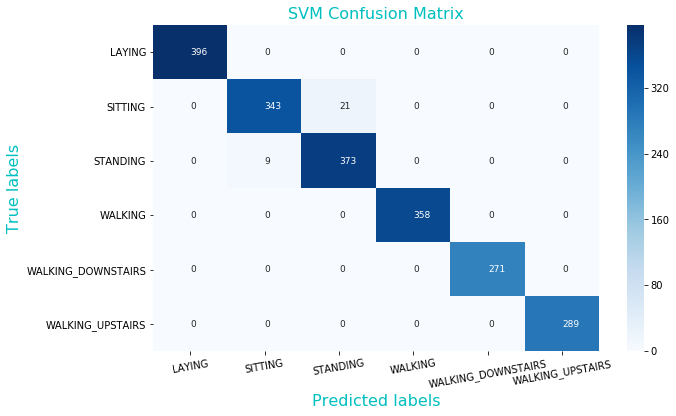

In [104]:
y_pred_SVC=classifier_SVC.predict(x_Scaler_test)
cm = confusion_matrix(y_labeled_test,y_pred_SVC)
print("Confusion matrix is :\n ", cm)

annot_kws = {"ha": 'left',"va": 'center','size': 9}
plt.figure(figsize=(10,6))
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g',cmap = 'Blues',annot_kws=annot_kws, ax=ax); 
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
# labels, title and ticks
ax.set_xlabel('Predicted labels',fontsize=16,color='c')
ax.set_ylabel('True labels',fontsize=16,color='c'); 
ax.set_title('SVM Confusion Matrix',fontsize=16,color='c'); 
plt.xticks(fontsize=10)
plt.yticks(fontsize=10,rotation=0)
ax.xaxis.set_ticklabels(z,rotation=10);
ax.yaxis.set_ticklabels(z);



### Showing Accuracy using accuracy_score

In [99]:
from sklearn.metrics import  accuracy_score

print('Accuracy of SVC--------->',round(accuracy_score(y_labeled_test, y_pred_SVC),2))


Accuracy of SVC---------> 0.99
